In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from matplotlib.colors import ListedColormap


In [3]:
df = pd.read_csv("breast-cancer.csv")


In [5]:
df['diagnosis'] = LabelEncoder().fit_transform(df['diagnosis'])


In [7]:
features = ['radius_mean', 'texture_mean']
X = df[features].values
y = df['diagnosis'].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_scaled, y_train)



SVC(kernel='linear')

In [15]:
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train_scaled, y_train)

SVC()

In [17]:
def plot_decision_boundary(clf, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.title(title)
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.tight_layout()
    plt.show()


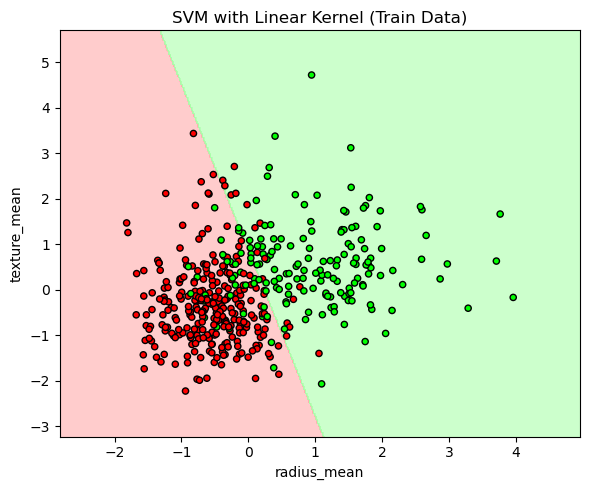

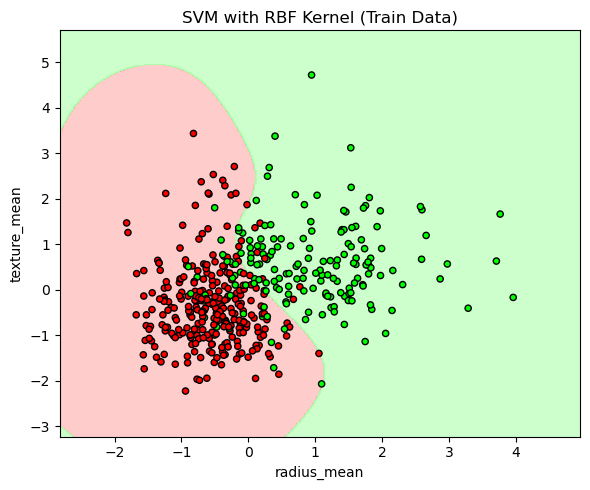

In [19]:
plot_decision_boundary(svm_linear, X_train_scaled, y_train, "SVM with Linear Kernel (Train Data)")
plot_decision_boundary(svm_rbf, X_train_scaled, y_train, "SVM with RBF Kernel (Train Data)")


In [21]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.1, 1, 10]
}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

Best Parameters: {'C': 10, 'gamma': 0.1}
Best CV Accuracy: 0.9010989010989011


In [23]:
y_pred = grid.predict(X_test_scaled)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))


Classification Report:

              precision    recall  f1-score   support

      Benign       0.93      0.93      0.93        71
   Malignant       0.88      0.88      0.88        43

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



In [25]:
X_scaled_all = scaler.transform(X)
cv_scores = cross_val_score(grid.best_estimator_, X_scaled_all, y, cv=5)
print("Cross-Validation Accuracy (mean):", cv_scores.mean())

Cross-Validation Accuracy (mean): 0.8945660611706255
